## Weight Initialization Analysis for Deep Nets

In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN not available)


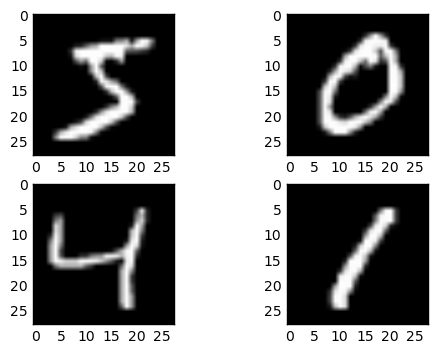

In [2]:
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [3]:
print("normalizing")

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


normalizing
X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


### Initial Weights = Zero

In [20]:
#Building and Compiling the model.
result = {} # to store results
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], init='zero'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))


model.add(Convolution2D(nb_filters*2, kernel_size[0], kernel_size[1], init='zero'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Convolution2D(nb_filters*4, kernel_size[0], kernel_size[1], init='zero'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(nb_filters*8, init='zero'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, init='zero'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
print (model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_33 (Convolution2D) (None, 32, 26, 26)    320         convolution2d_input_9[0][0]      
____________________________________________________________________________________________________
activation_49 (Activation)       (None, 32, 26, 26)    0           convolution2d_33[0][0]           
____________________________________________________________________________________________________
convolution2d_34 (Convolution2D) (None, 32, 24, 24)    9248        activation_49[0][0]              
____________________________________________________________________________________________________
activation_50 (Activation)       (None, 32, 24, 24)    0           convolution2d_34[0][0]           
___________________________________________________________________________________________

In [21]:
model_zero = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=50,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
y_zero = model.predict(X_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])
result["zero"] = model_zero.history
#print (result)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 27s - loss: 2.3019 - acc: 0.1123 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 2/50
60000/60000 [==============================] - 27s - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 3/50
60000/60000 [==============================] - 27s - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 4/50
60000/60000 [==============================] - 27s - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 5/50
60000/60000 [==============================] - 27s - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 6/50
60000/60000 [==============================] - 27s - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 7/50
60000/60000 [==============================] - 27s - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 8/50
60000/60000 [==============================

### Random Weights (0-5000000)

In [28]:
def my_init(shape, name=None):
    value = np.random.random(shape) * np.random.randint(5000000)
    return K.variable(value, name=name)

model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape, init=my_init))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], init=my_init))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))


model.add(Convolution2D(nb_filters*2, kernel_size[0], kernel_size[1], init=my_init))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Convolution2D(nb_filters*4, kernel_size[0], kernel_size[1], init=my_init))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(nb_filters*8, init=my_init))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, init=my_init))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
print (model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_45 (Convolution2D) (None, 32, 26, 26)    320         convolution2d_input_12[0][0]     
____________________________________________________________________________________________________
activation_67 (Activation)       (None, 32, 26, 26)    0           convolution2d_45[0][0]           
____________________________________________________________________________________________________
convolution2d_46 (Convolution2D) (None, 32, 24, 24)    9248        activation_67[0][0]              
____________________________________________________________________________________________________
activation_68 (Activation)       (None, 32, 24, 24)    0           convolution2d_46[0][0]           
___________________________________________________________________________________________

In [41]:
model_random = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=50,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
y_random = model.predict(X_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])
result["random"] = model_random.history
#print (result)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 24s - loss: 14.4835 - acc: 0.1014 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 2/50
60000/60000 [==============================] - 24s - loss: 14.4861 - acc: 0.1013 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 3/50
60000/60000 [==============================] - 25s - loss: 14.4561 - acc: 0.1031 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 4/50
60000/60000 [==============================] - 25s - loss: 14.4695 - acc: 0.1023 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 5/50
60000/60000 [==============================] - 24s - loss: 14.4802 - acc: 0.1016 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 6/50
60000/60000 [==============================] - 24s - loss: 14.4722 - acc: 0.1021 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 7/50
60000/60000 [==============================] - 24s - loss: 14.4501 - acc: 0.1035 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 8/50
60000/60000 [================

In [30]:

model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape, init='glorot_normal'))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], init='glorot_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))


model.add(Convolution2D(nb_filters*2, kernel_size[0], kernel_size[1], init='glorot_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Convolution2D(nb_filters*4, kernel_size[0], kernel_size[1], init='glorot_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(nb_filters*8, init='glorot_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, init='glorot_normal'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
print (model.summary())

model_test = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=50,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
y_glorot = model.predict(X_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])
result["glorot"] = model_test.history
print (result)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_49 (Convolution2D) (None, 32, 26, 26)    320         convolution2d_input_13[0][0]     
____________________________________________________________________________________________________
activation_73 (Activation)       (None, 32, 26, 26)    0           convolution2d_49[0][0]           
____________________________________________________________________________________________________
convolution2d_50 (Convolution2D) (None, 32, 24, 24)    9248        activation_73[0][0]              
____________________________________________________________________________________________________
activation_74 (Activation)       (None, 32, 24, 24)    0           convolution2d_50[0][0]           
___________________________________________________________________________________________

### Weights (-1 to 1)

In [31]:
#result = {}
def random_uniform_range(shape=[1,],low=0,high=1):
    """
    Random uniform range

    Produces a random uniform distribution of specified shape, with arbitrary max and
    min values. Default shape is [1], and default range is [0,1].
    """
    return np.random.rand(shape) * (high - min) + min

def my_init(shape, name=None):
    value = np.random.uniform(low=-1, high=1, size=(shape))
    return K.variable(value, name=name)

model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape, init='normal'))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], init='normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))


model.add(Convolution2D(nb_filters*2, kernel_size[0], kernel_size[1], init='normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Convolution2D(nb_filters*4, kernel_size[0], kernel_size[1], init='normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(nb_filters*8, init='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, init='normal'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
print (model.summary())

model_1_1 = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=50,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
y_random_1_1 = model.predict(X_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])
result["random_1_1"] = model_1_1.history
print (result)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_53 (Convolution2D) (None, 32, 26, 26)    320         convolution2d_input_14[0][0]     
____________________________________________________________________________________________________
activation_79 (Activation)       (None, 32, 26, 26)    0           convolution2d_53[0][0]           
____________________________________________________________________________________________________
convolution2d_54 (Convolution2D) (None, 32, 24, 24)    9248        activation_79[0][0]              
____________________________________________________________________________________________________
activation_80 (Activation)       (None, 32, 24, 24)    0           convolution2d_54[0][0]           
___________________________________________________________________________________________

In [33]:
def my_init(shape, name=None):
    low = np.random.randint(1000)
    high = np.random.randint(1000) + low
    value = np.random.uniform(low=low, high=high, size=(shape))
    return K.variable(value, name=name)

model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape, init=my_init))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], init=my_init))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))


model.add(Convolution2D(nb_filters*2, kernel_size[0], kernel_size[1], init=my_init))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Convolution2D(nb_filters*4, kernel_size[0], kernel_size[1], init=my_init))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(nb_filters*8, init=my_init))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, init=my_init))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
print (model.summary())

model_random = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=50,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
y_random = model.predict(X_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])
result["random1_1"] = model_random.history
print (result)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_61 (Convolution2D) (None, 32, 26, 26)    320         convolution2d_input_16[0][0]     
____________________________________________________________________________________________________
activation_91 (Activation)       (None, 32, 26, 26)    0           convolution2d_61[0][0]           
____________________________________________________________________________________________________
convolution2d_62 (Convolution2D) (None, 32, 24, 24)    9248        activation_91[0][0]              
____________________________________________________________________________________________________
activation_92 (Activation)       (None, 32, 24, 24)    0           convolution2d_62[0][0]           
___________________________________________________________________________________________

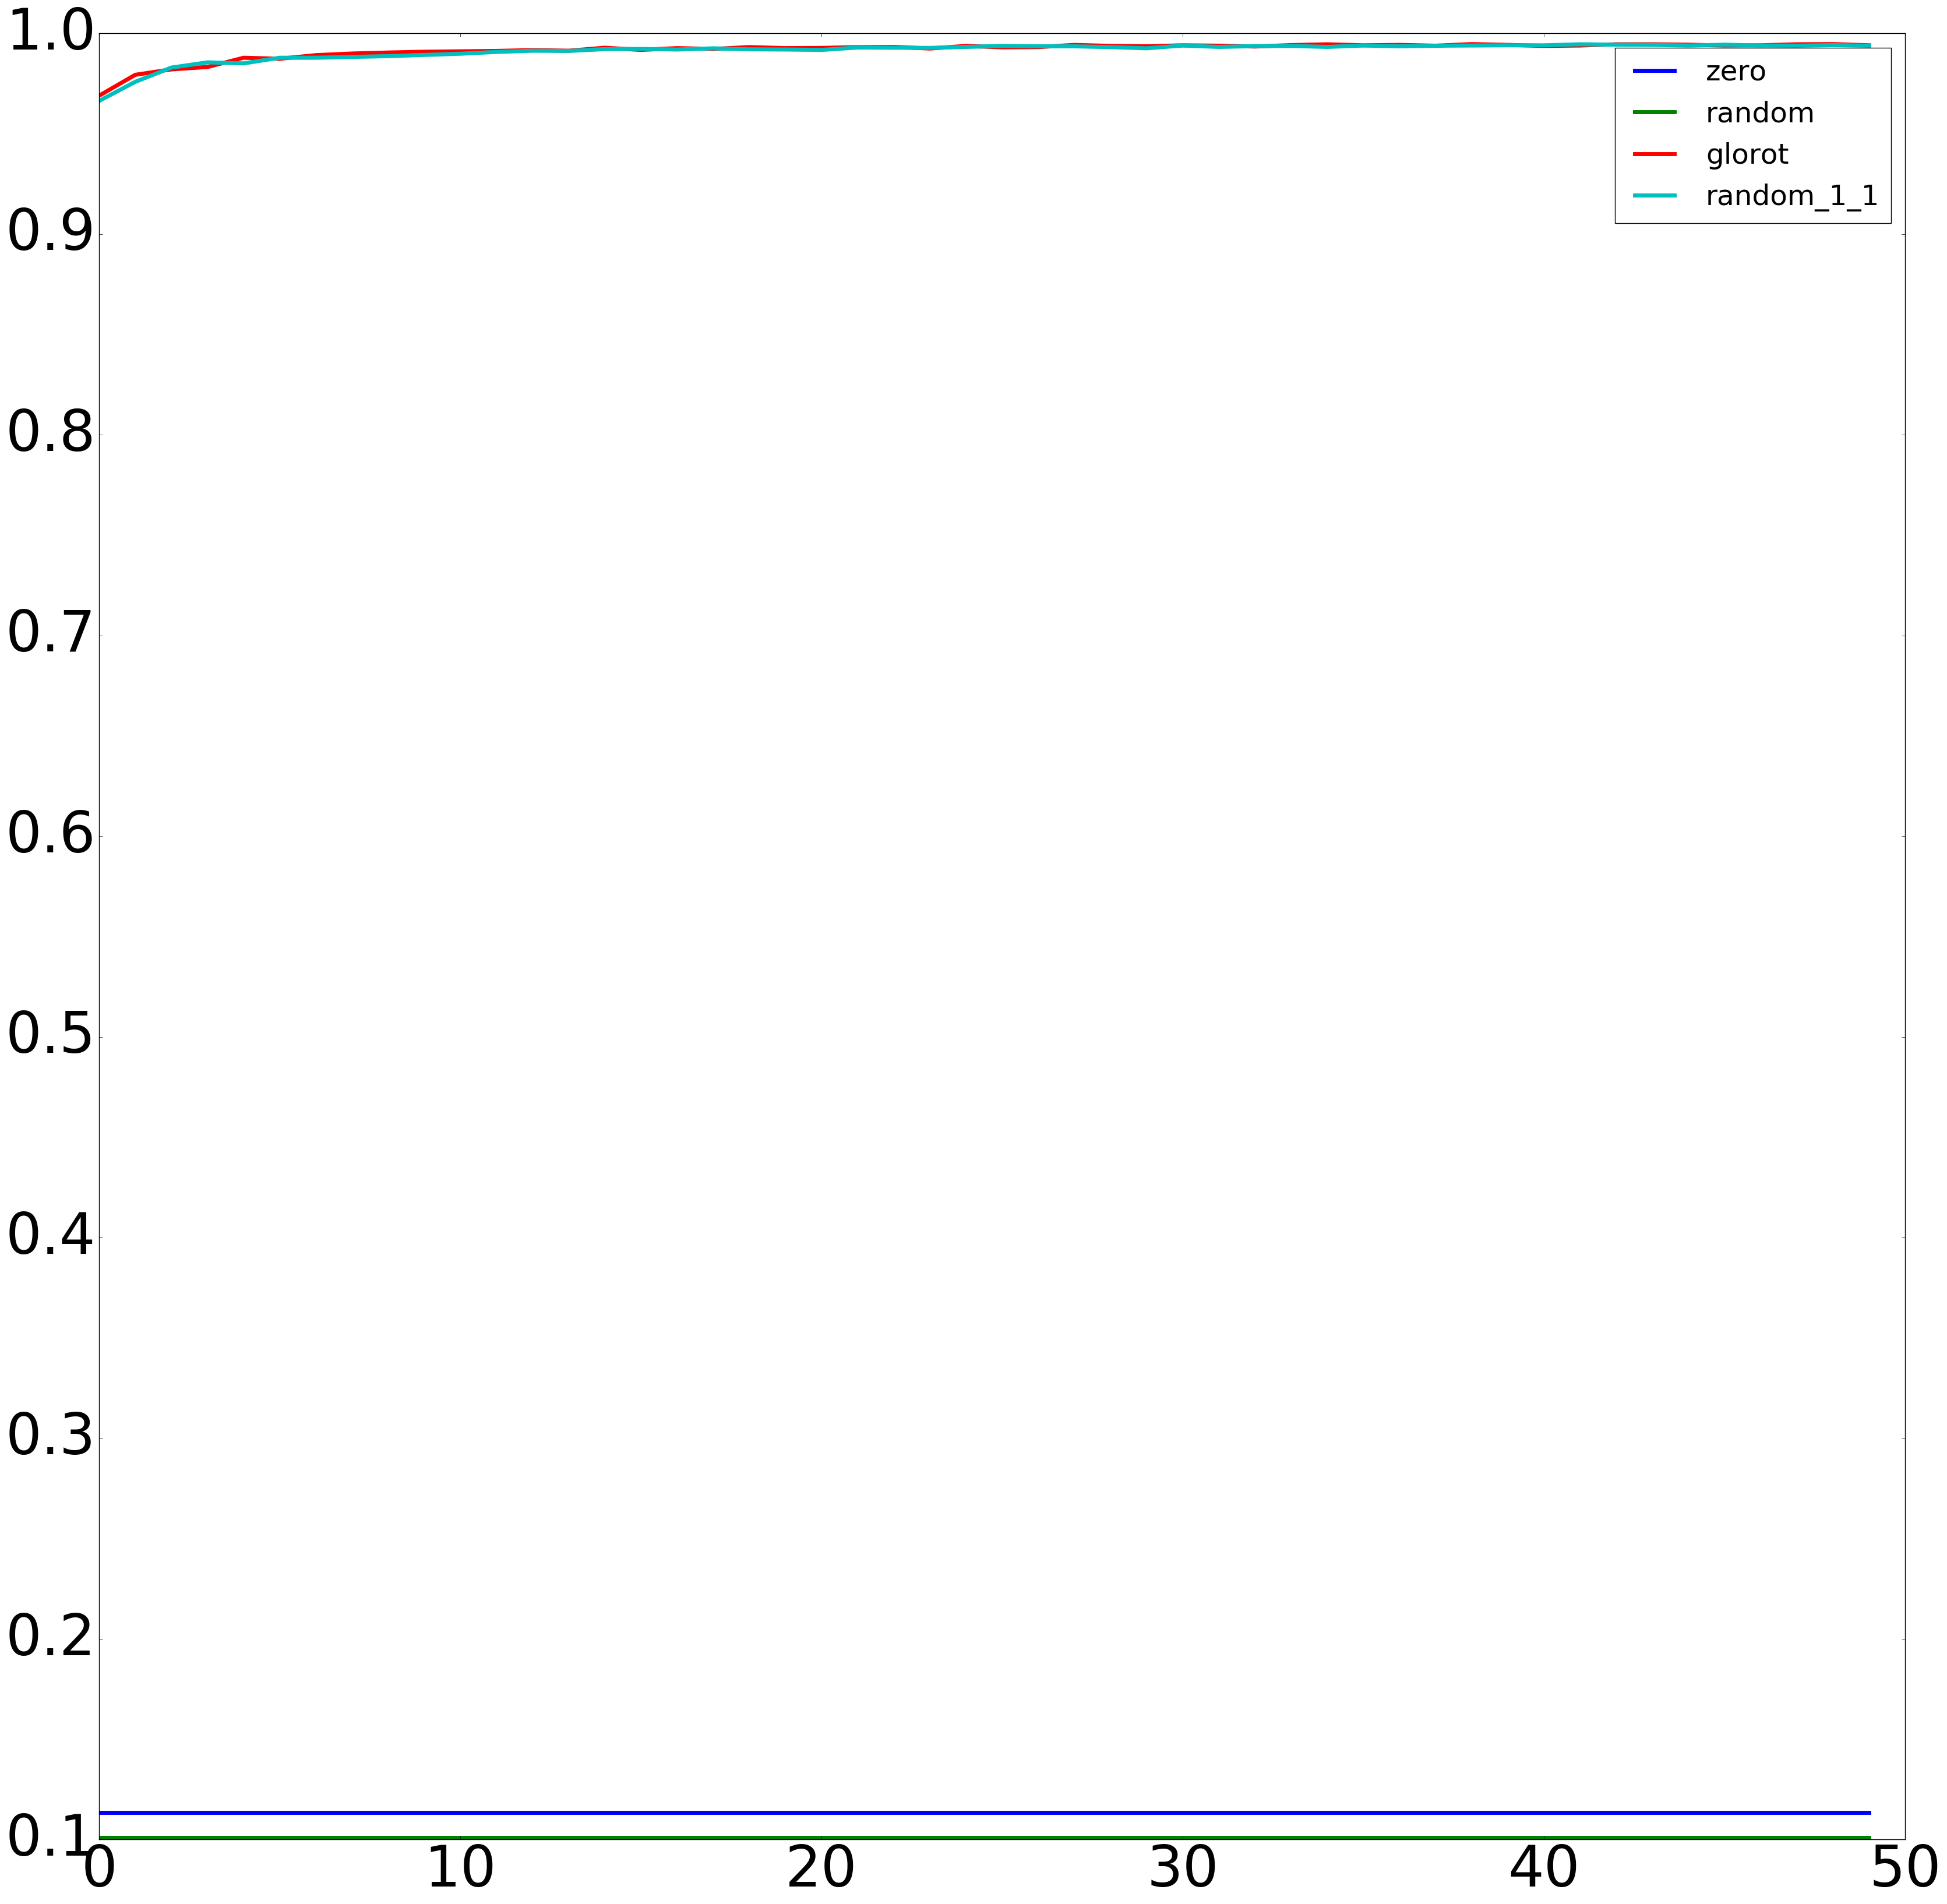

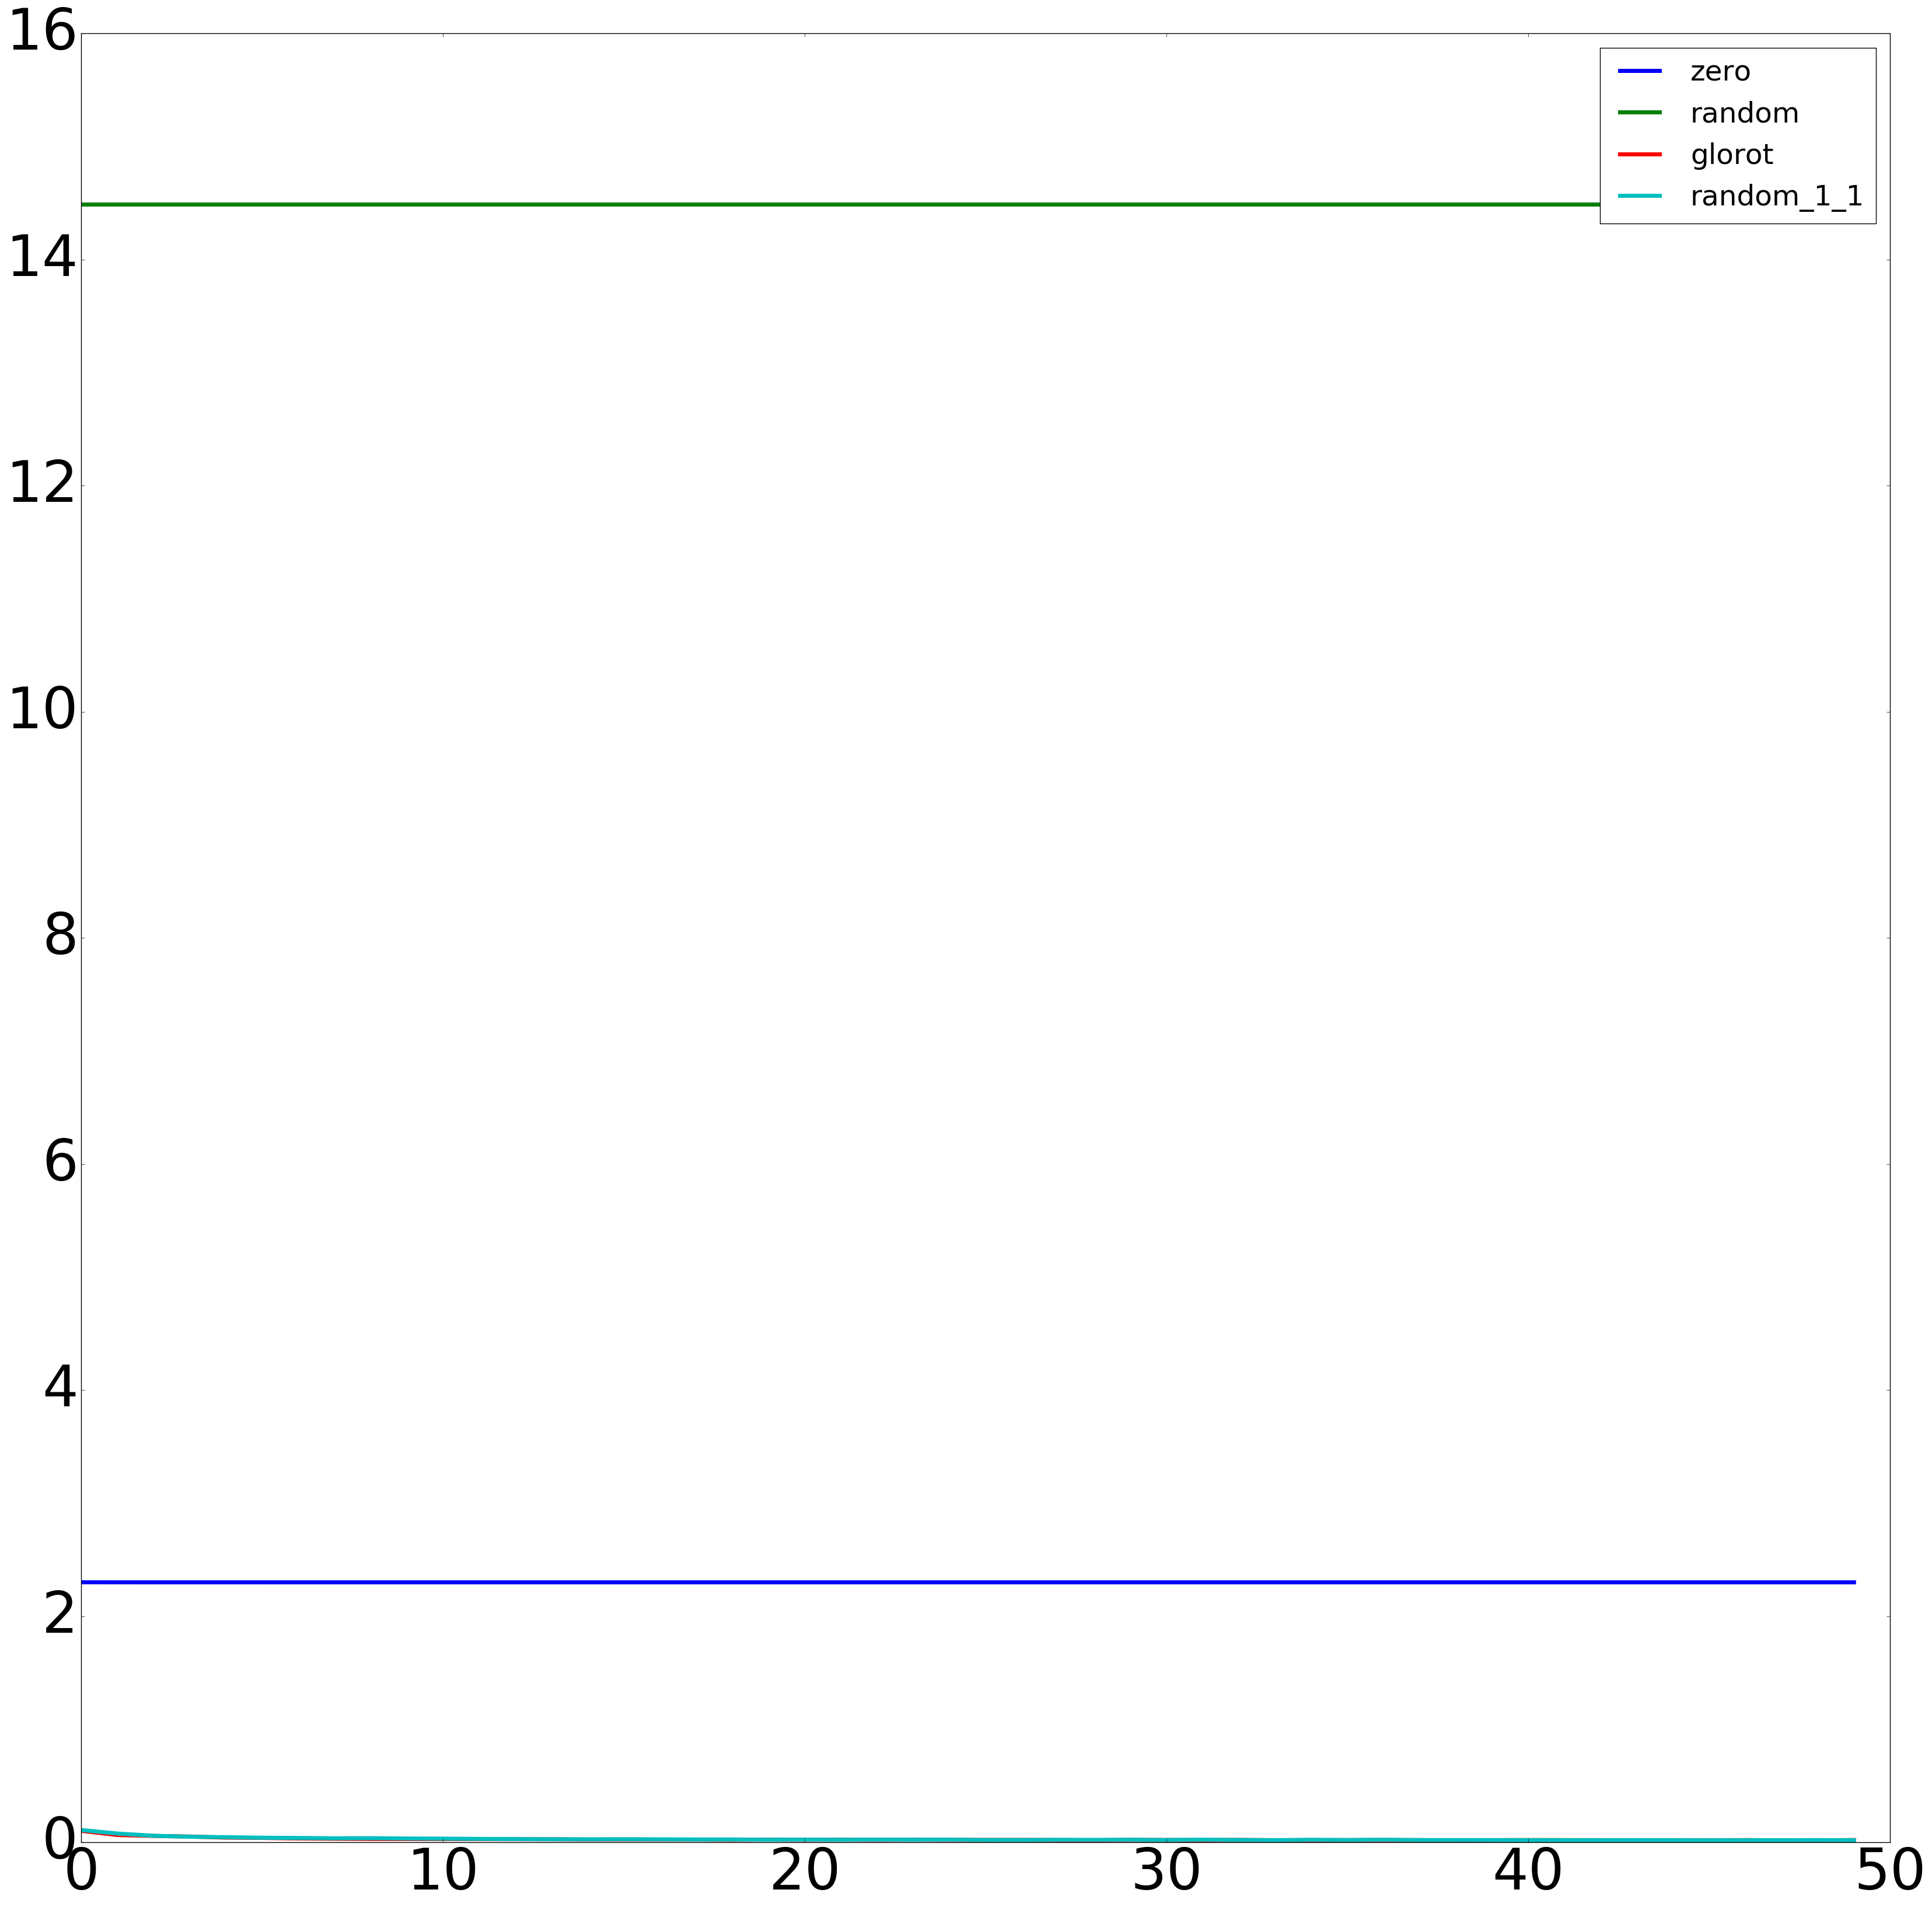

In [42]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40

legends = []
for key in result.keys():
    plt.plot(result[key]['val_acc'],linewidth=5)
    legends.append(key)
plt.legend(legends, loc='upper right',prop={'size':35})
plt.tick_params(axis='both', which='major', labelsize=70)
plt.tick_params(axis='both', which='minor', labelsize=70)
plt.show()
plt.savefig('validationAccuracy_weights.eps')

legends = []
for key in result.keys():
    plt.plot(result[key]['val_loss'],linewidth=5)
    legends.append(key)
plt.legend(legends, loc='upper right',prop={'size':35})
plt.tick_params(axis='both', which='major', labelsize=70)
plt.tick_params(axis='both', which='minor', labelsize=70)
plt.show()
plt.savefig('validationLoss_weights.eps')


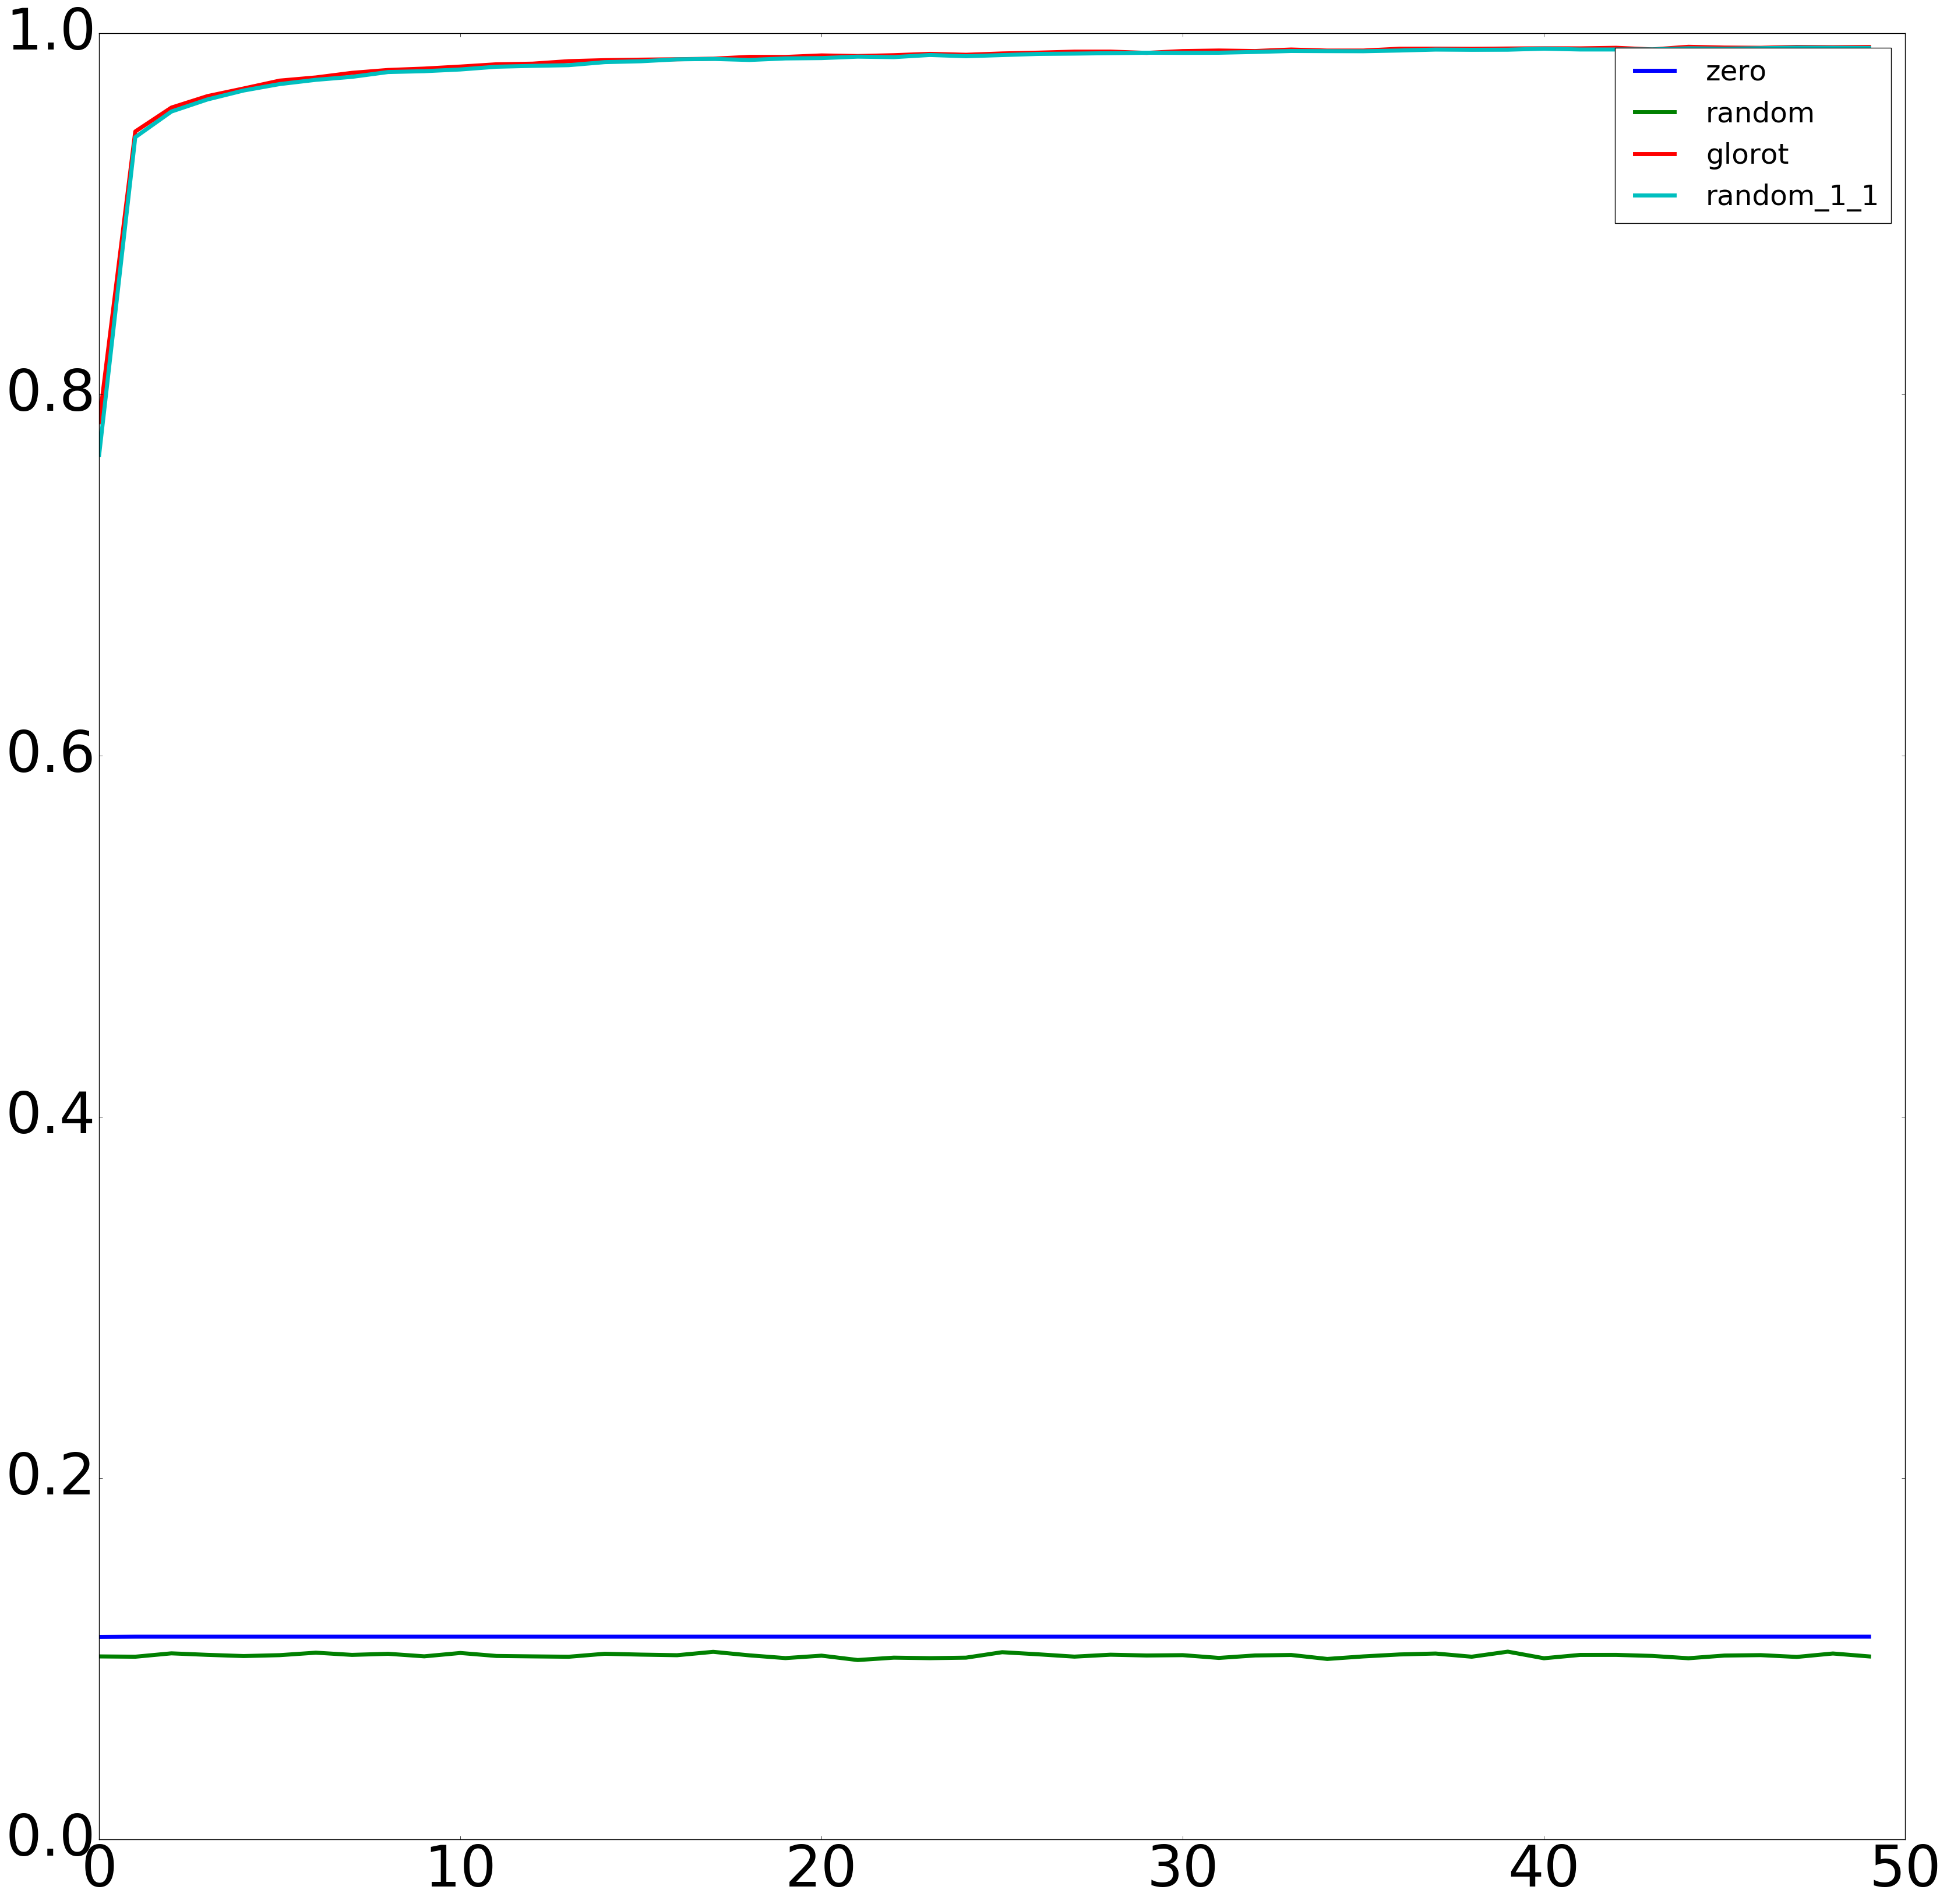

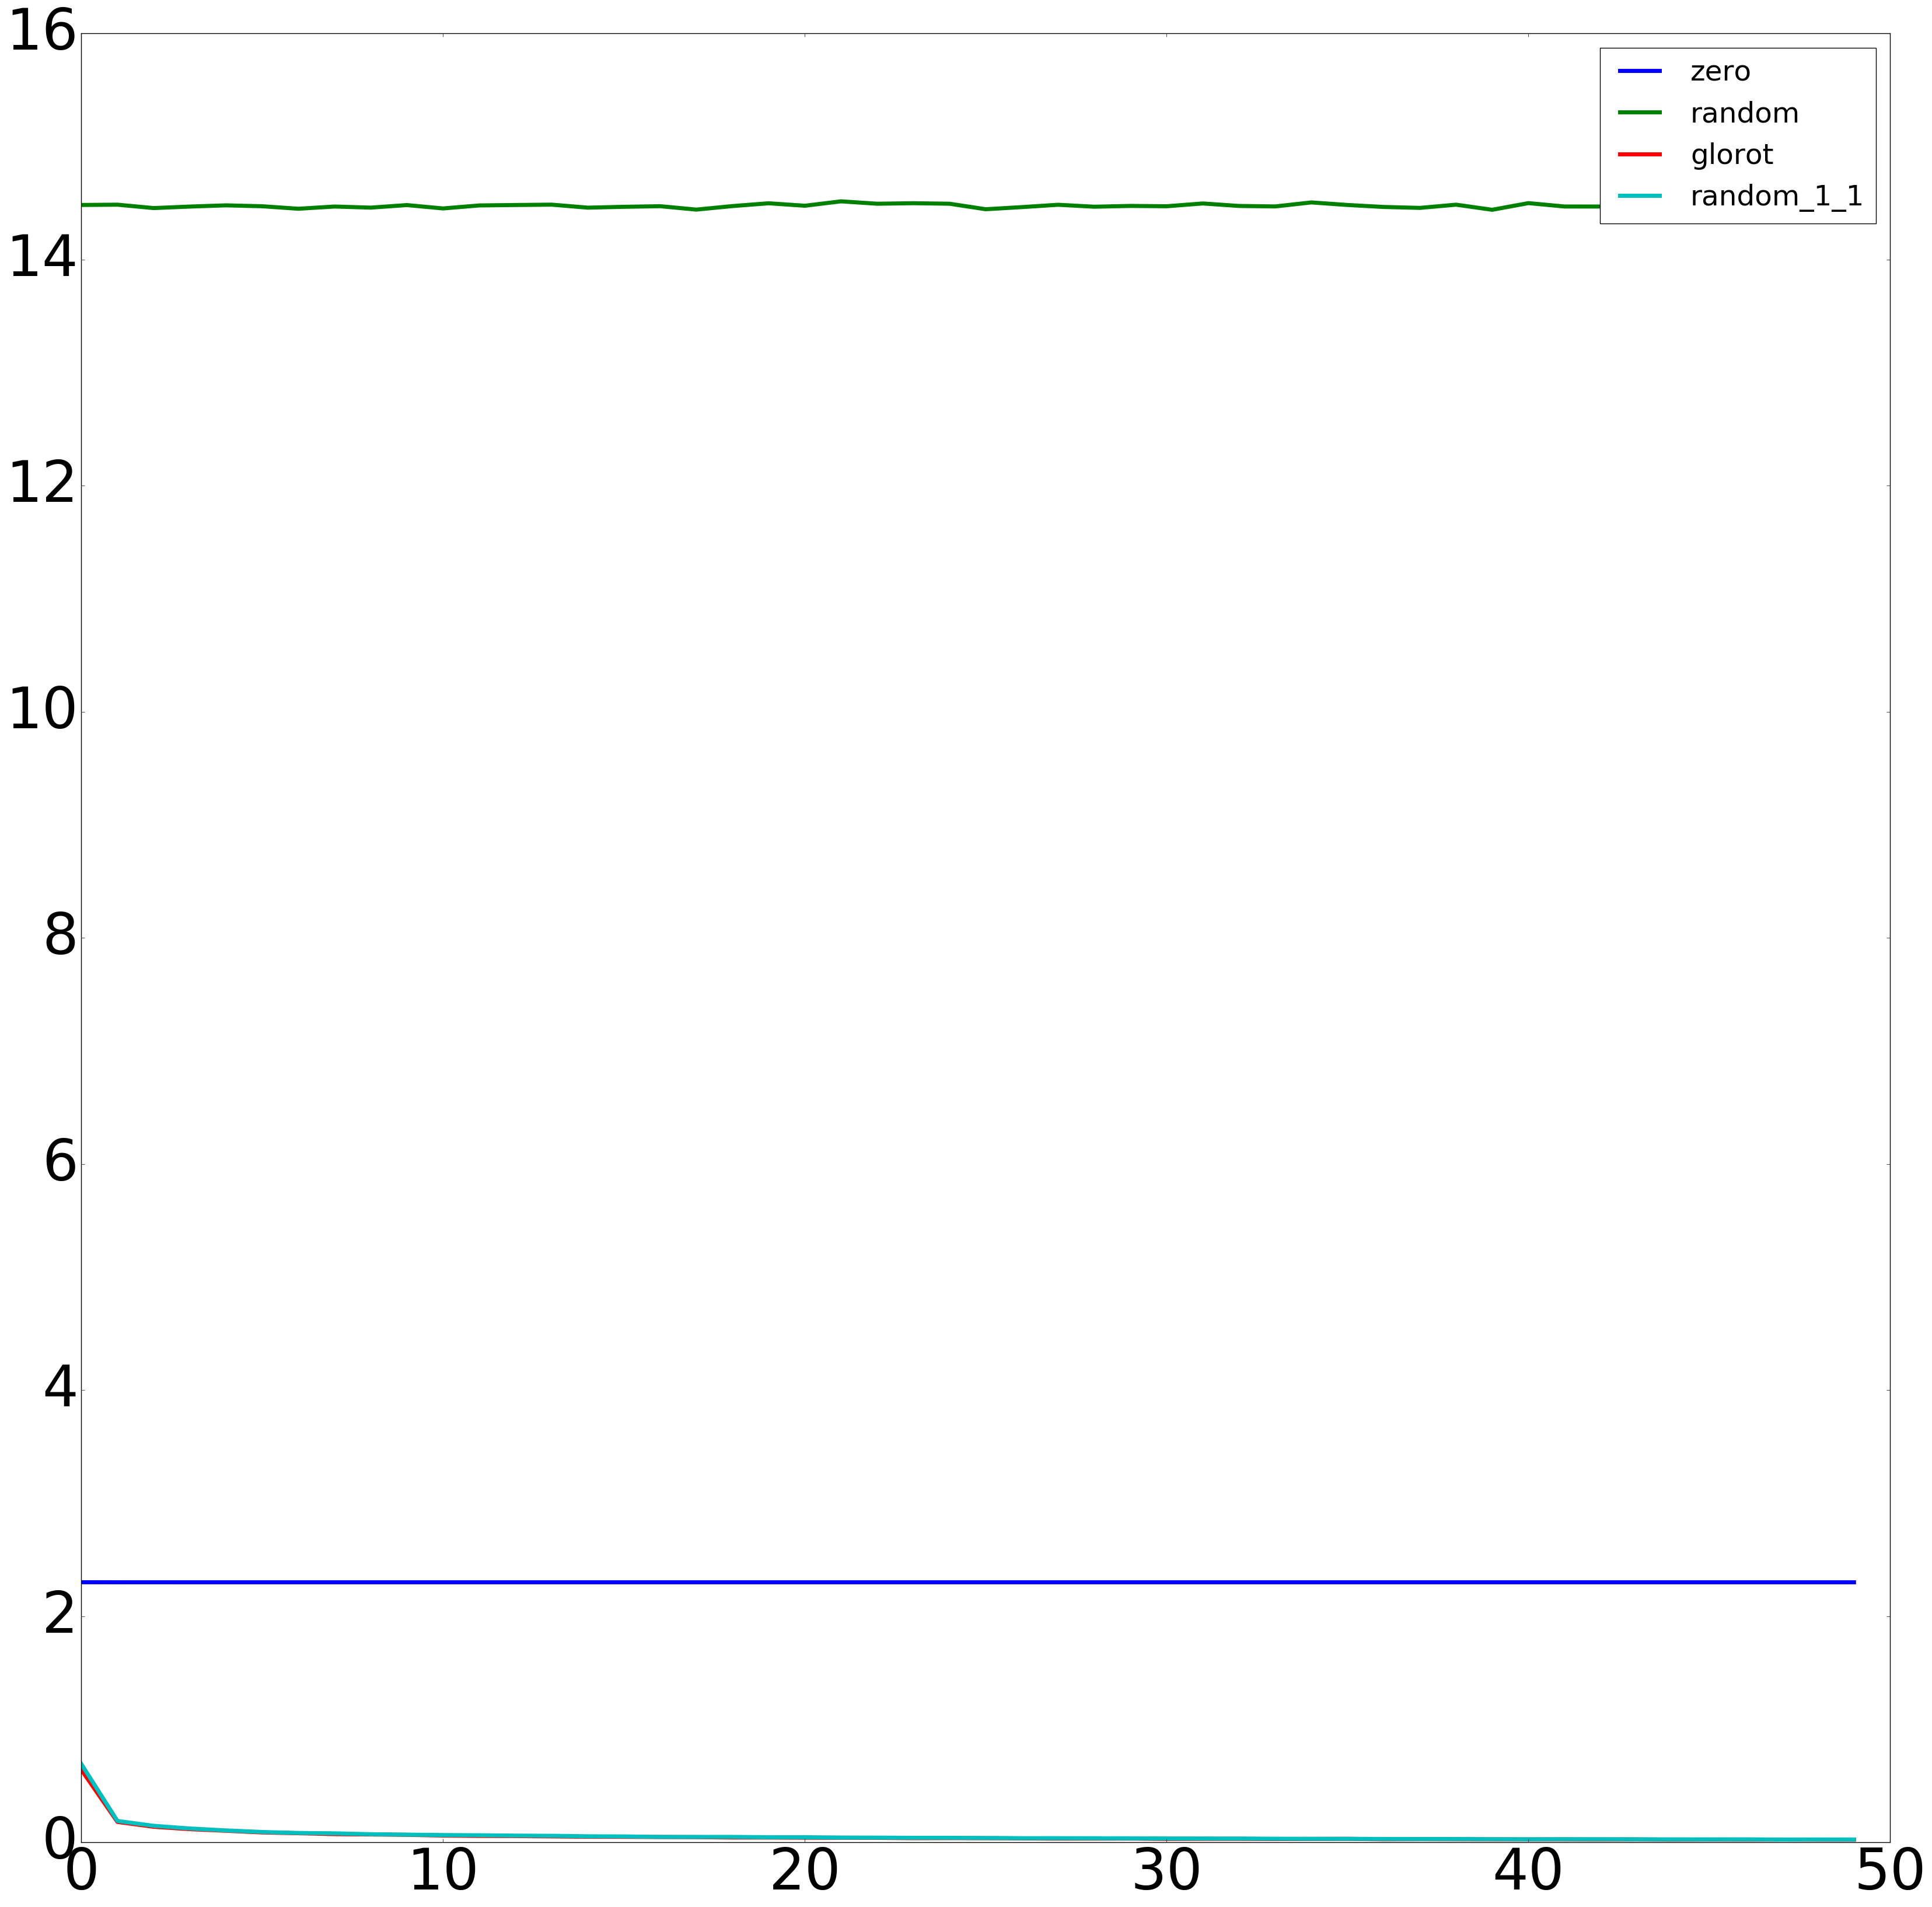

In [43]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40

legends = []
for key in result.keys():
    plt.plot(result[key]['acc'],linewidth=5)
    legends.append(key)
plt.legend(legends, loc='upper right',prop={'size':35})
plt.tick_params(axis='both', which='major', labelsize=70)
plt.tick_params(axis='both', which='minor', labelsize=70)
plt.show()
plt.savefig('validationAccuracy_weights.eps')

legends = []
for key in result.keys():
    plt.plot(result[key]['loss'],linewidth=5)
    legends.append(key)
plt.legend(legends, loc='upper right',prop={'size':35})
plt.tick_params(axis='both', which='major', labelsize=70)
plt.tick_params(axis='both', which='minor', labelsize=70)
plt.show()
plt.savefig('validationLoss_weights.eps')

10000
4


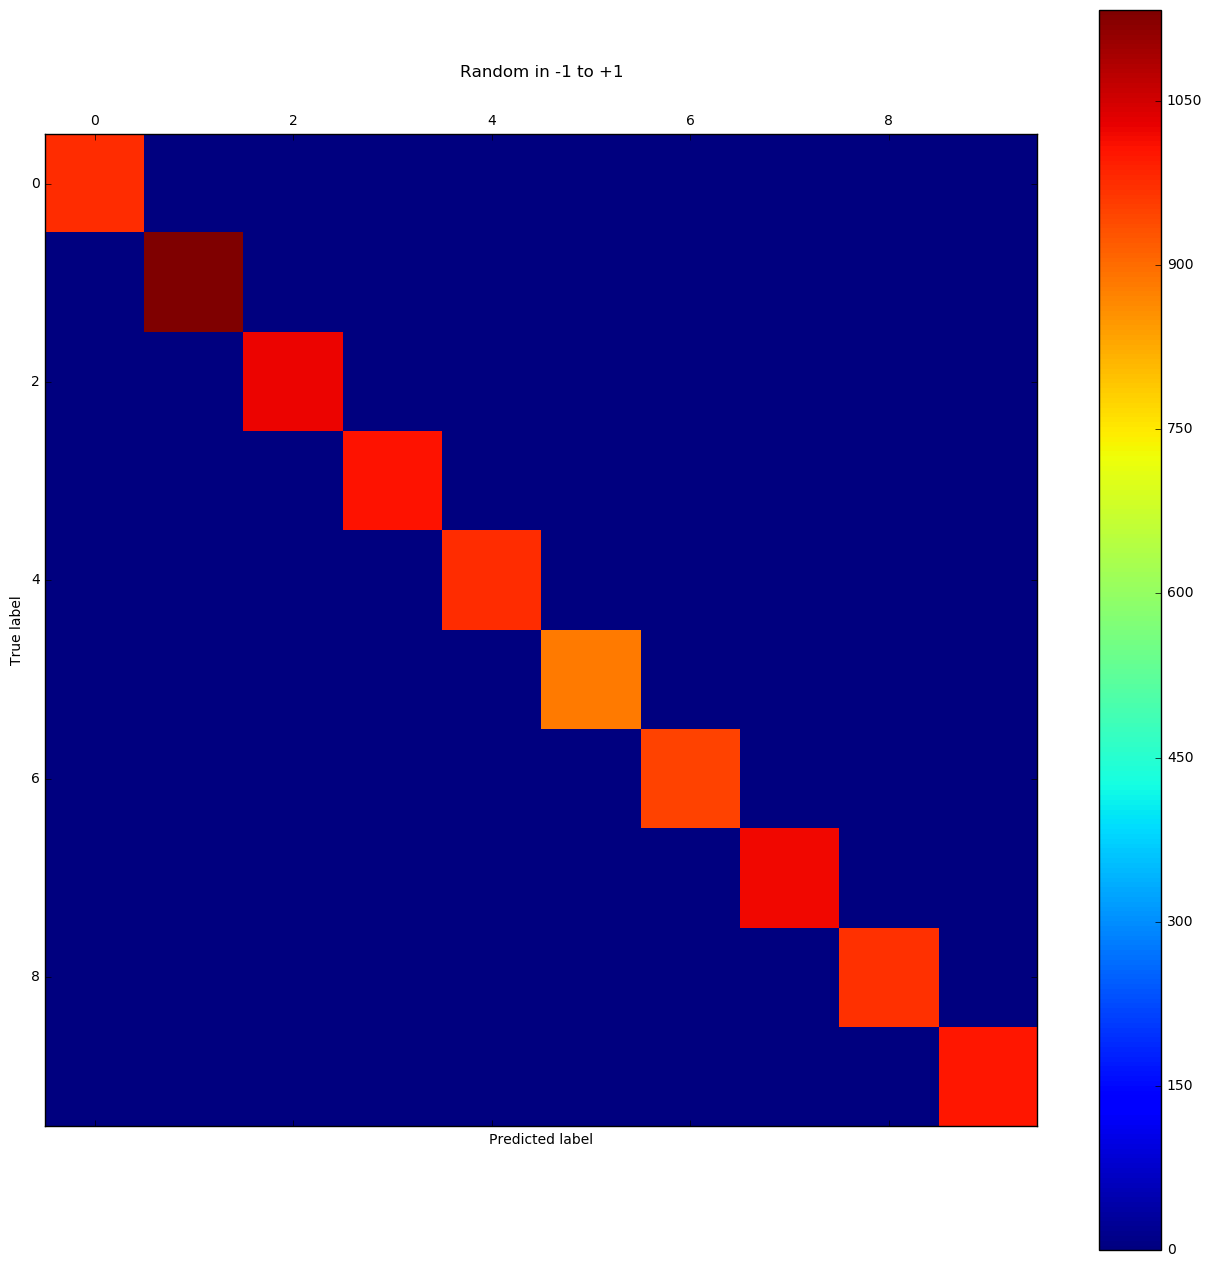

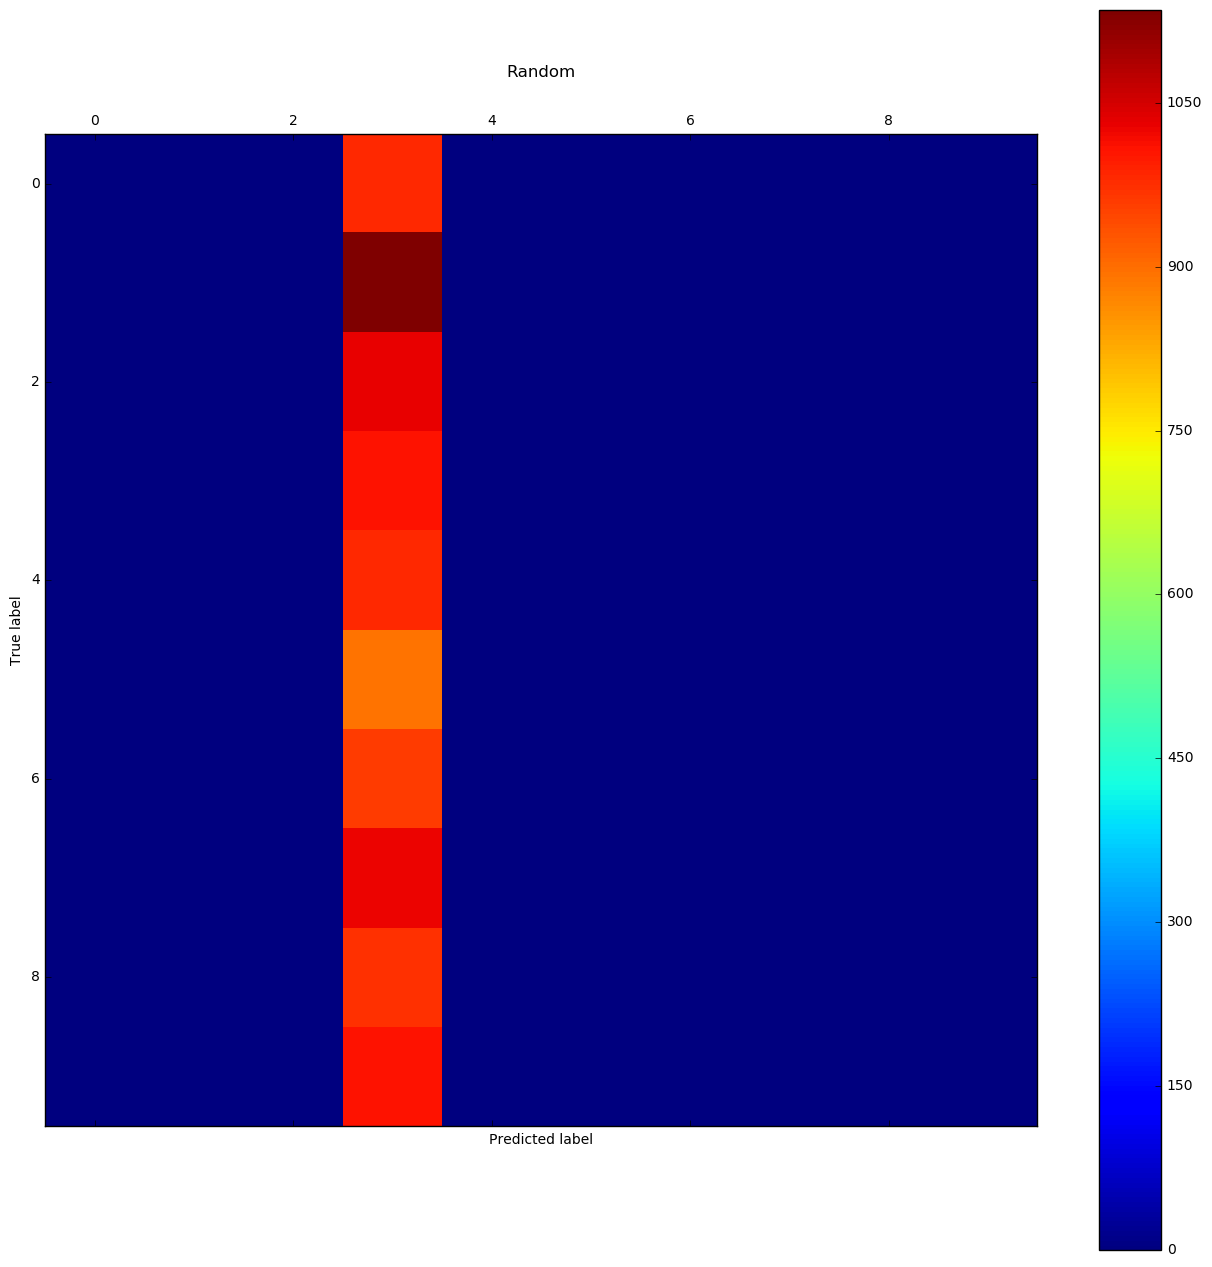

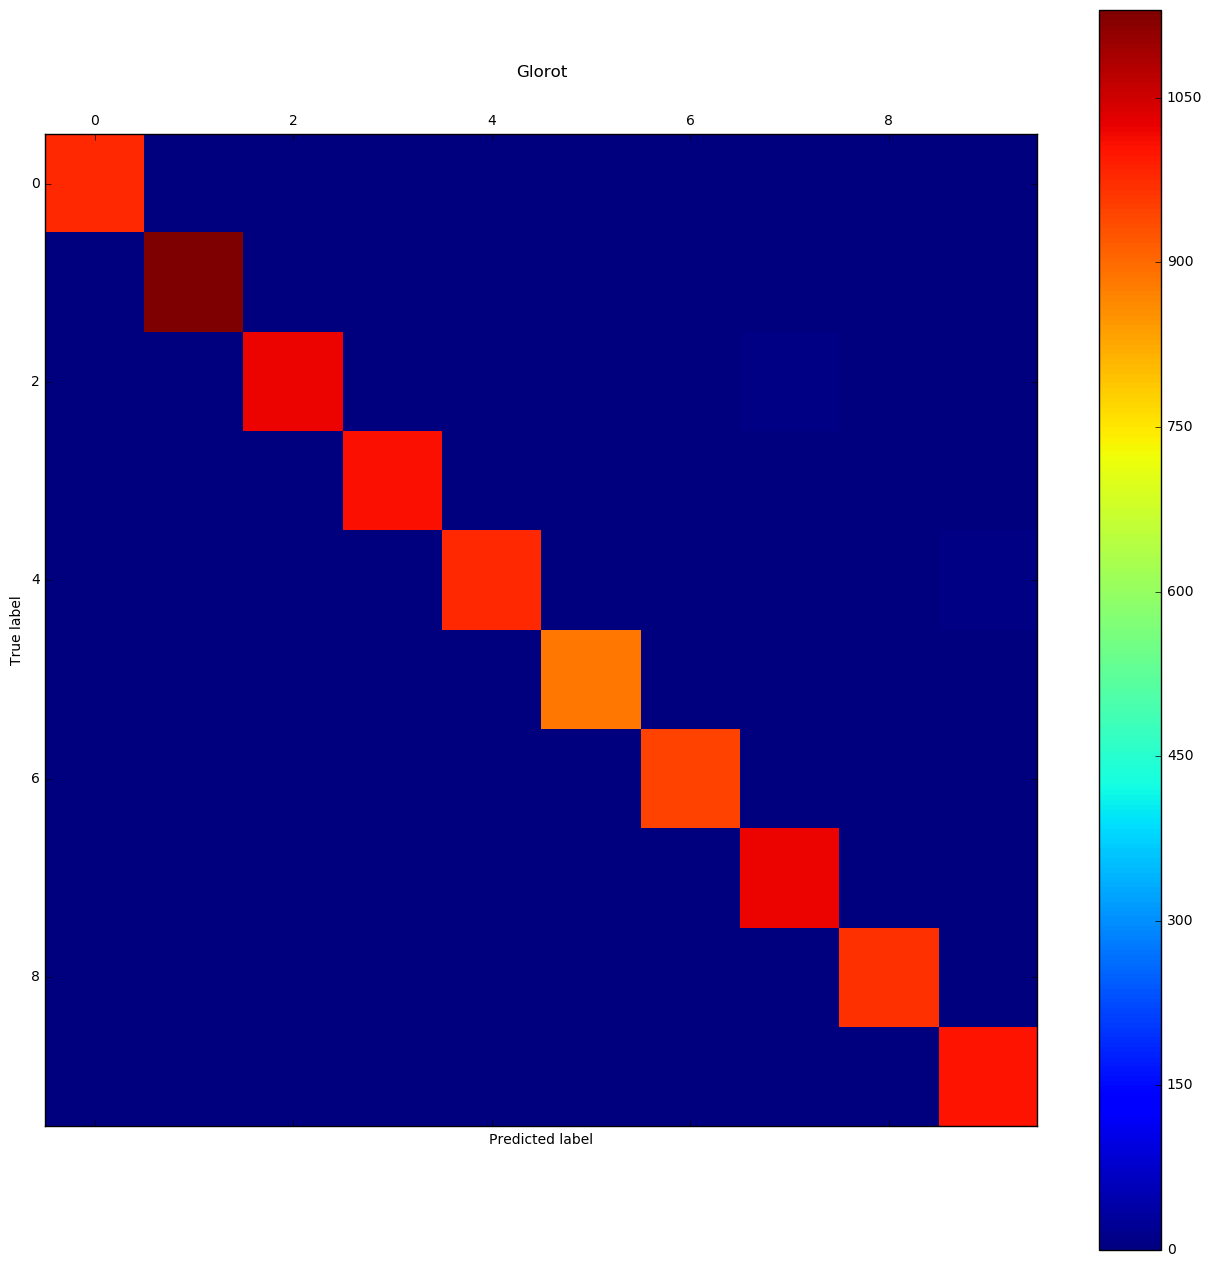

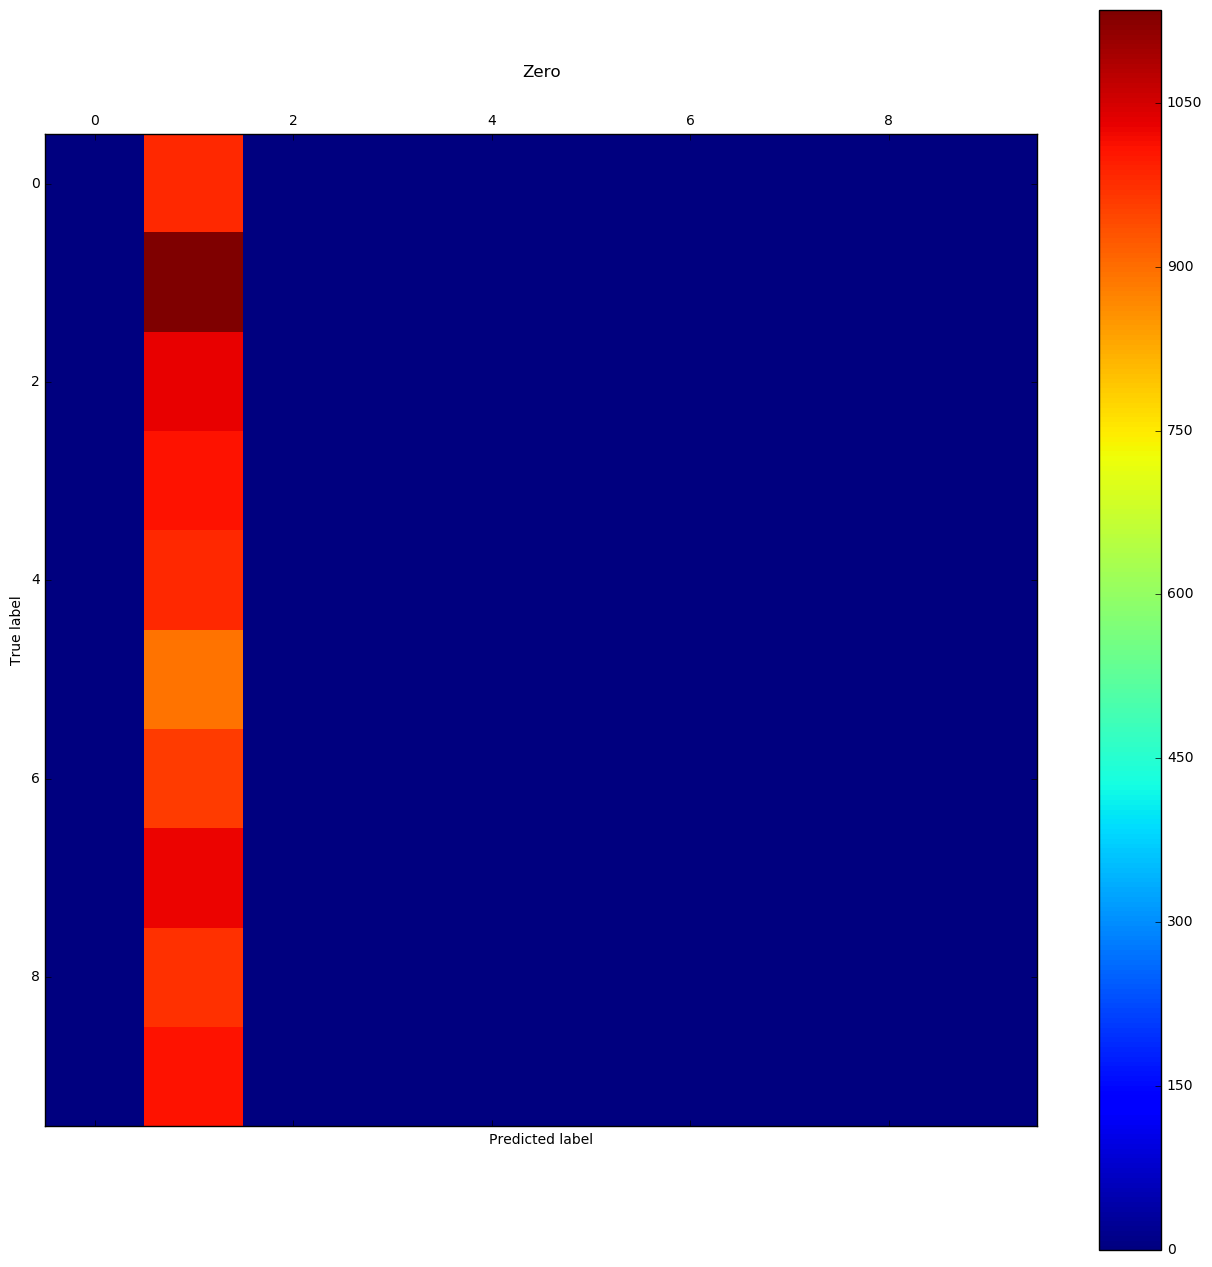

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

preds = [y_random_1_1, y_random, y_glorot, y_zero ]
labels = ["Random in -1 to +1", "Random", "Glorot", "Zero"]
new_preds = []
for i in preds:
    temp = []
    for j in i:
        m = max(j)
        temp.append(list(j).index(m))
    new_preds.append(temp)
    

print (len(y_test))
print (len(new_preds))
for i in range(4):
    cm = confusion_matrix(y_test, new_preds[i])
    plt.matshow(cm)
    plt.title(labels[i])
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    